In [1]:
import os
import numpy as np
import pandas as pd

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

/data5/deepro/miniconda3/envs/starrseq/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
peak_dir = "/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data"
lib_names = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
def get_file_length(filename):
    f = open(filename, "r")
    lenf = len(f.readlines())
    f.close()
    return lenf

def get_peak_file(peak_dir, lib):
    return os.path.join(peak_dir, lib, "peaks.bed")


def get_peak_count_df(lib_names):
    peak_files = [get_peak_file(peak_dir, ln) for ln in lib_names]
    counts = [get_file_length(pf) for pf in peak_files]
    df = pd.DataFrame({"library": lib_names, "peaks": counts})
    return df


In [5]:
peak_df = get_peak_count_df(lib_names)

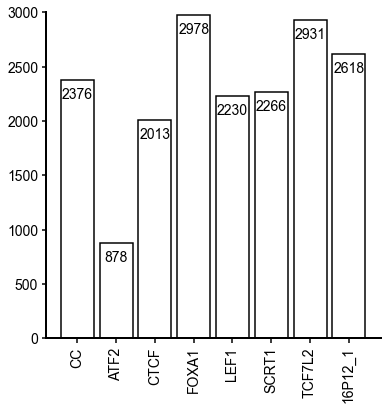

In [7]:
fig,ax = plt.subplots(1,1,figsize=(6, 6))
ax.bar(peak_df.library, peak_df.peaks, width=0.85, color="none",  edgecolor="k", linewidth=1.5) #sns.color_palette("Set2", 8).as_hex() #color="lightgrey", sns.color_palette("rocket", 8).as_hex()[::-1]

# ax = sns.barplot(data=peak_df, x="library", y="peaks", aspect=1.25, height=8, palette="Set3")
ax.set_xticks(range(8), lib_names, rotation=90);
rects = ax.patches
# Make some labels.
for rect in rects:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - 200, f"{height}", ha="center", va="bottom"
    )
ax.set_ylim(0, 3000)
ax.spines[['right', 'top']].set_visible(False)

In [8]:
save_file = "../data/figures/peaks_per_lib.pdf"
pdf = PdfPages(save_file)
pdf.savefig(fig, bbox_inches='tight')
pdf.close()